In [1]:
# Text and Annotation
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib as mpl
plt.style.use("seaborn-whitegrid")
import numpy as np 
import pandas as pd 

/tmp/ipykernel_466924/34636161.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
# Effect of Holidatys on US Births 
# shell command to download the data:
# !cd data && curl -O \
# https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/
# births.csv

In [3]:
from datetime import datetime 

path = "/__PROJECTS/aa_CommonData/ml/"
births = pd.read_csv(path+"births.csv")
quartiles = np.percentile(births["births"], [25,50,75])

mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [4]:
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month +
    births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
        [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day)
        for (month, day) in births_by_date.index]


<Axes: >

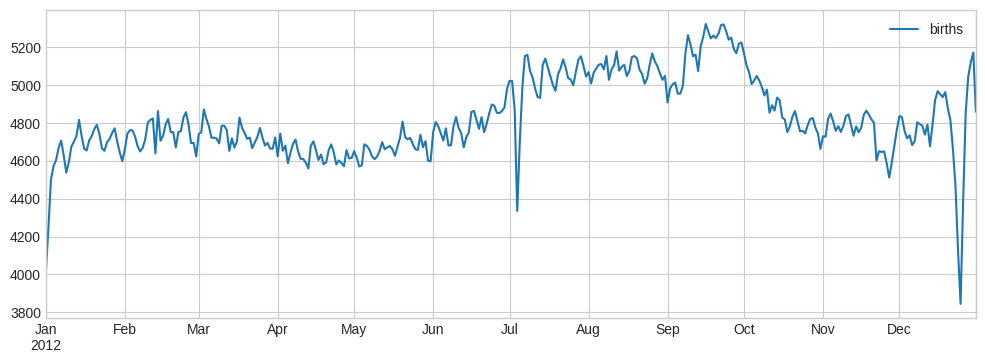

In [5]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

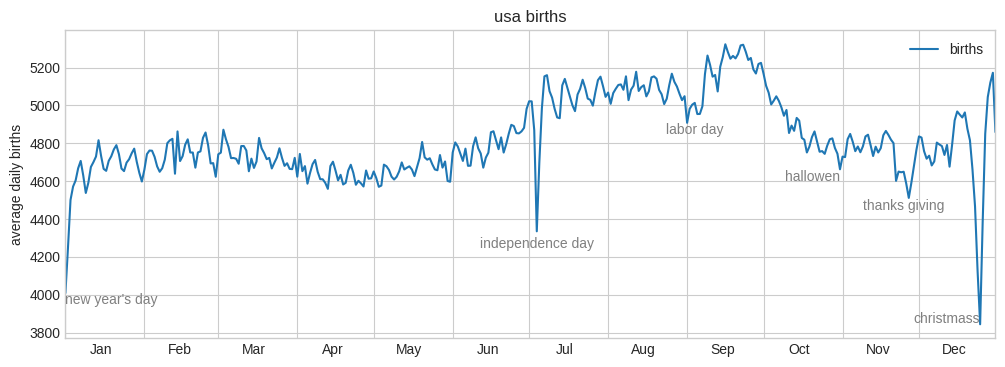

In [8]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

# add labels to the plot
style = dict(size=10, color="gray")

ax.text("2012-1-1", 3950, "new year's day", **style)
ax.text("2012-7-4", 4250, "independence day", ha="center", **style)
ax.text("2012-9-4", 4850, "labor day", ha="center", **style)
ax.text("2012-10-31", 4600, "hallowen", ha="right", **style)
ax.text("2012-11-25", 4450, "thanks giving", ha="center", **style)
ax.text("2012-12-25", 3850, "christmass", ha="right", **style)

# label the axes 
ax.set(title = "usa births", ylabel="average daily births")

# format the x-axis with centered month labels 
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

In [ ]:
# Transforms and Text Position 
# ax.transData -> with data coordinates 
# ax.transAxes -> with the axes (in units of axes dimensions)
# fig.transFigure -> with the figure (in units of figure dimensions)

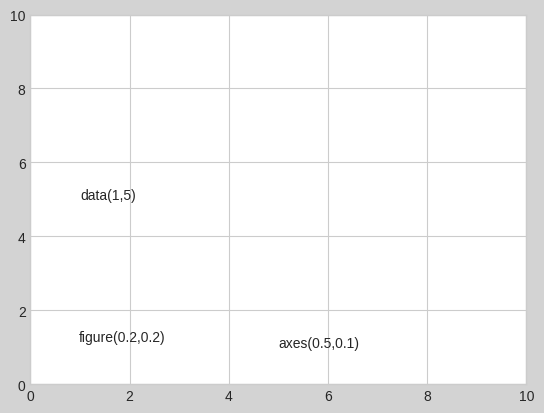

In [15]:
fig, ax = plt.subplots(facecolor="lightgray")
ax.axis([0,10,0,10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1,5, "data(1,5)", transform=ax.transData)
ax.text(0.5, 0.1, "axes(0.5,0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, "figure(0.2,0.2)", transform=fig.transFigure);

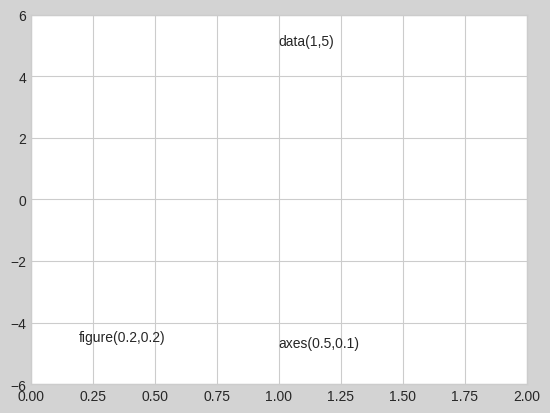

In [16]:
ax.set_xlim(0,2)
ax.set_ylim(-6,6)
fig 

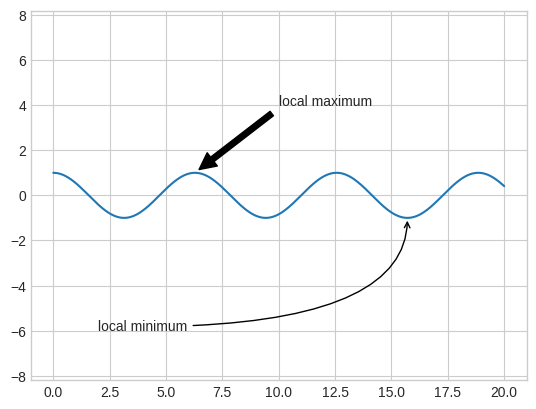

In [19]:
# arrows and annotations 

fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
    arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
    arrowprops=dict(arrowstyle="->",
connectionstyle="angle3,angleA=0,angleB=-90"));

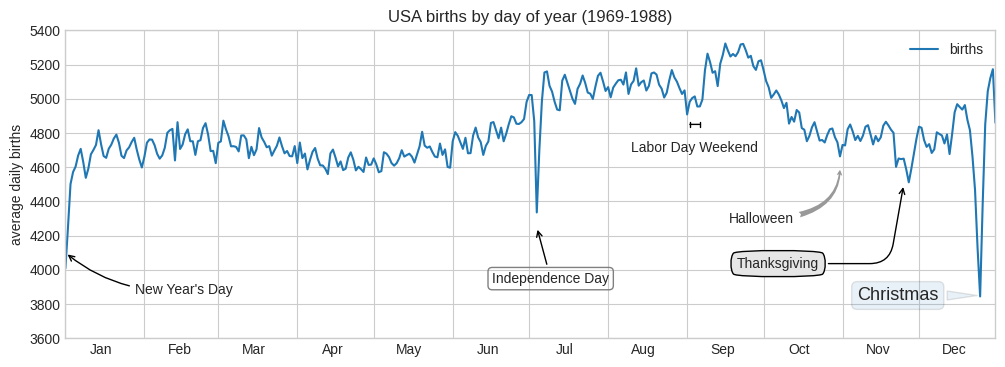

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
    xytext=(50, -30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
    connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
    bbox=dict(boxstyle="round", fc="none", ec="gray"),
    xytext=(10, -40), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day Weekend', xy=('2012-9-4', 4850), xycoords='data',
    ha='center', xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
    xycoords='data', textcoords='data',
    arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
    xytext=(-80, -40), textcoords='offset points',
    arrowprops=dict(arrowstyle="fancy",
    fc="0.6", ec="none",
    connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
    xytext=(-120, -60), textcoords='offset points',
    bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
    arrowprops=dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
    xytext=(-30, 0), textcoords='offset points',
    size=13, ha='right', va="center",
    bbox=dict(boxstyle="round", alpha=0.1),
    arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
    ylabel='average daily births')
# Format the x-axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);